In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

import sys
sys.path.append('..')
from deap.convolve import convDEAP
from scipy.signal import convolve2d

In [2]:
image = plt.imread("./img/bass.jpg")

# Define kernel
C = 3
gaussian_kernel = np.zeros((3, 3, C, 1))
for k in range(C):
    gaussian_kernel[:, :, k, 0] = \
        np.array([
            [1, 2, 1],
            [2, 4, 2],
            [1, 2, 1]]) * 1/16
        
greyscale = np.mean(image, axis=(2,))
paddedInputs = np.pad(image, ((2, 2), (2, 2), (0, 0)), 'constant')

<IPython.core.display.Javascript object>


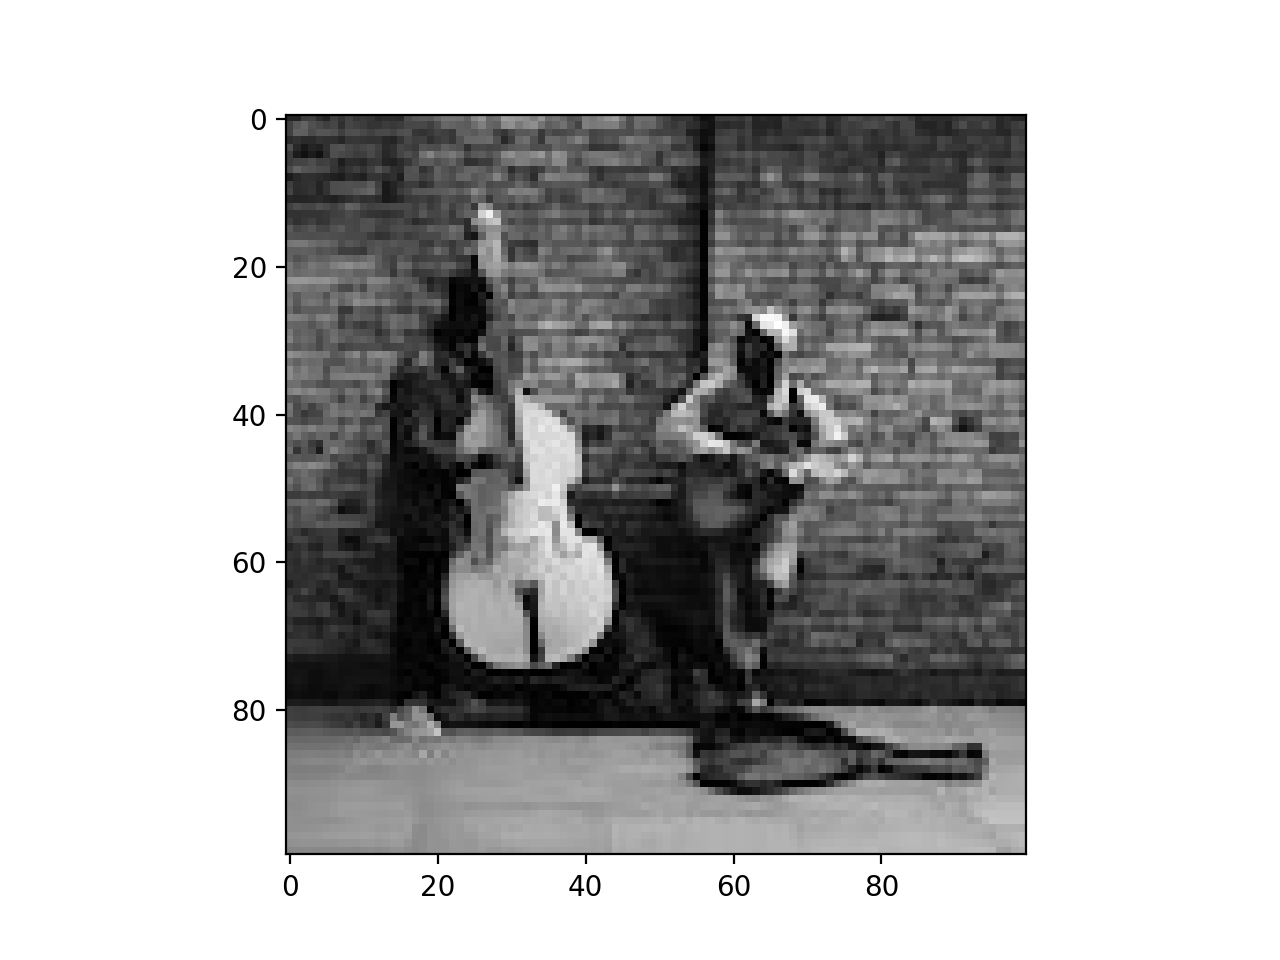

In [3]:
plt.figure()
plt.imshow(greyscale, cmap='gray')

<IPython.core.display.Javascript object>


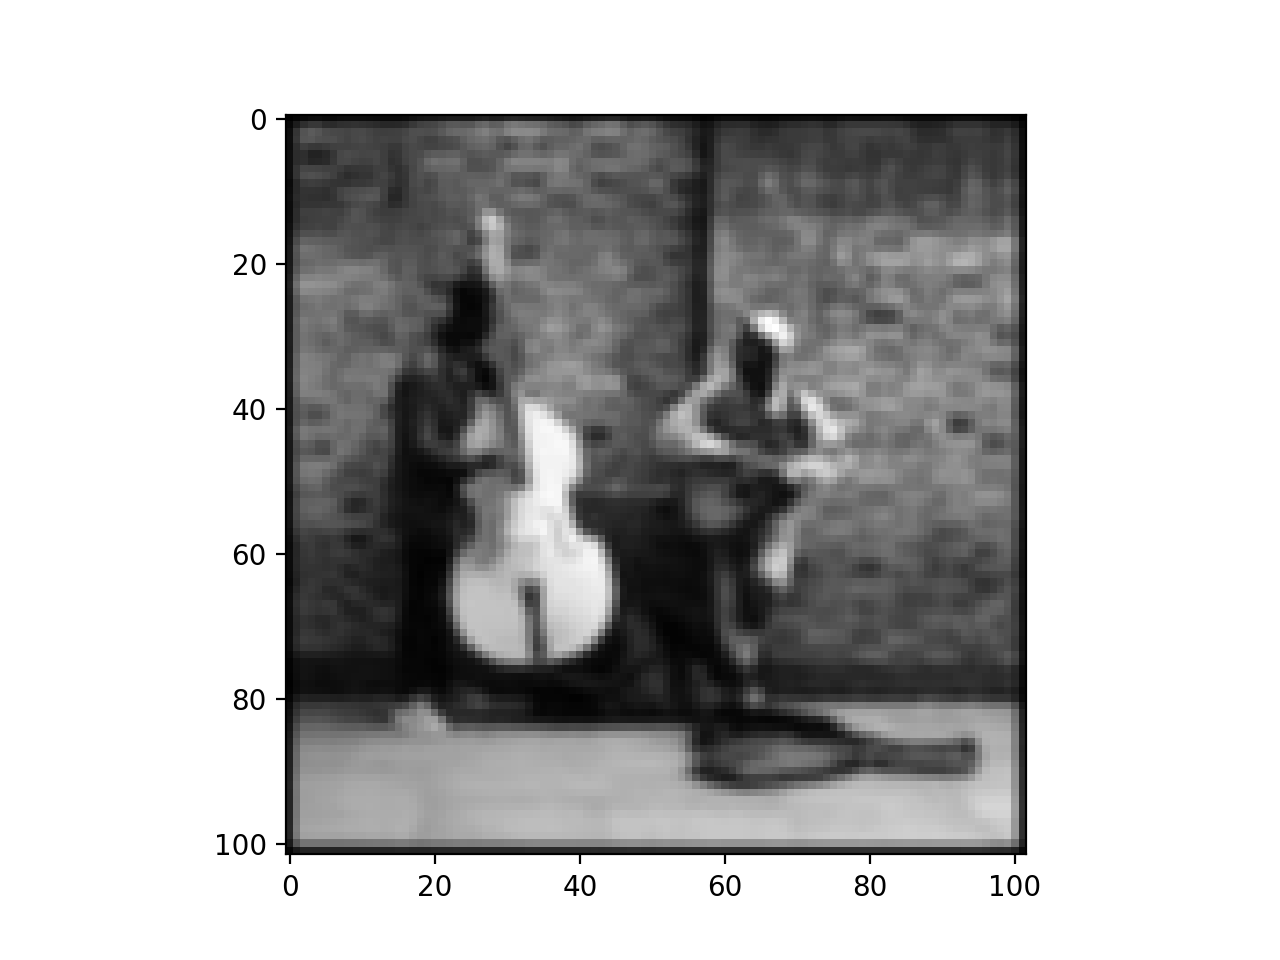

In [4]:
# Perform convolution
plt.figure()
convolved = convDEAP(paddedInputs, gaussian_kernel, 1)
plt.imshow(convolved[:, :, 0], cmap='gray')

<IPython.core.display.Javascript object>


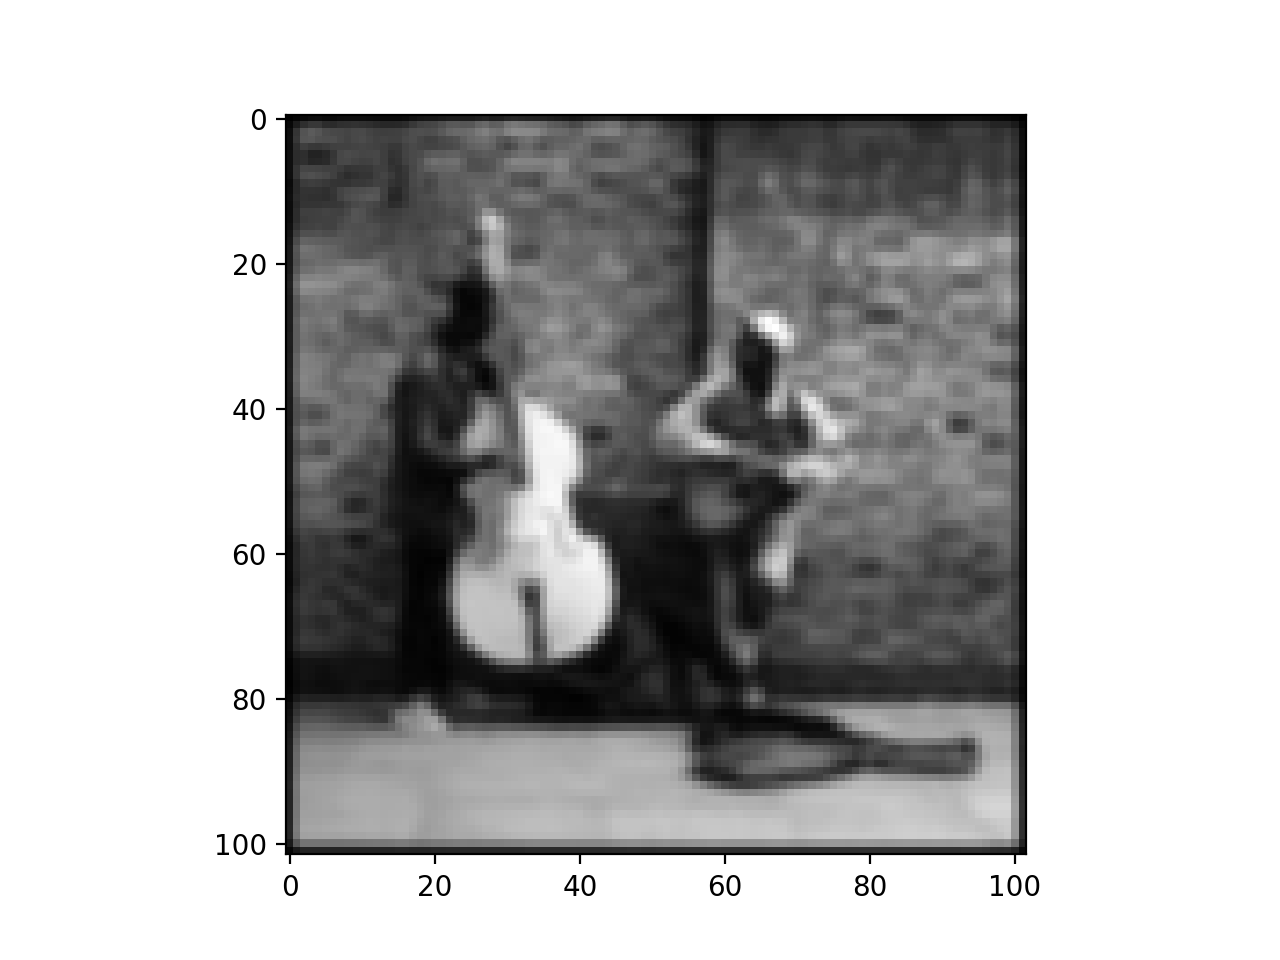

In [5]:
conv_scipy_r = convolve2d(image[:, :, 0], gaussian_kernel[:, :, 0, 0])
conv_scipy_g = convolve2d(image[:, :, 1], gaussian_kernel[:, :, 1, 0])
conv_scipy_b = convolve2d(image[:, :, 2], gaussian_kernel[:, :, 2, 0])
conv_scipy = conv_scipy_r + conv_scipy_g + conv_scipy_b
plt.figure()
plt.imshow(conv_scipy, cmap='gray')

In [6]:
err = np.abs(convolved[:, :, 0] - conv_scipy)
mse = np.sum(err**2) / (err.size)
print("MSE distance per pixel", mse)

MSE distance per pixel 23.429903382513785
